# Biosignals Processing

## Import Data

In [1]:
# Import packages
import neurokit as nk
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]  # Bigger figures

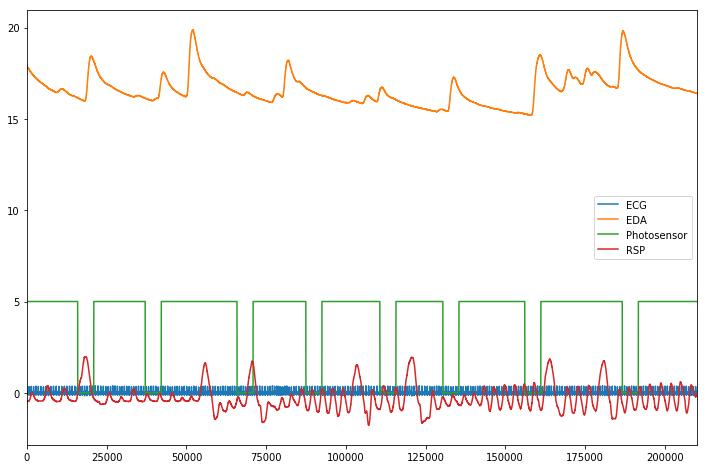

In [2]:
df = pd.read_csv("data_bio.csv")
df.plot()

df contains 3.5 minutes of data recorded at 1000Hz. There are 4 channels, EDA, ECG, RSP and the Photosensor used to localize events.

## Process it

In [3]:
bio_features = nk.process_bio(ecg=df["ECG"], rsp=df["RSP"], eda=df["EDA"])
bio_features.keys()  # See what it contains

dict_keys(['EDA_Filtered', 'SCR_Peaks_Amplitudes', 'EDA_Phasic', 'Heart_Beats', 'ECG_Filtered', 'Heart_Rate', 'HRV', 'ECG_Rpeaks_Indexes', 'EDA_Raw', 'SCR_Onsets', 'ECG_Raw', 'RSP_Rate', 'RSP_Filtered', 'SCR_Peaks_Indexes', 'RSP_Raw'])

## ECG Miscellaenous

### Heart Beats

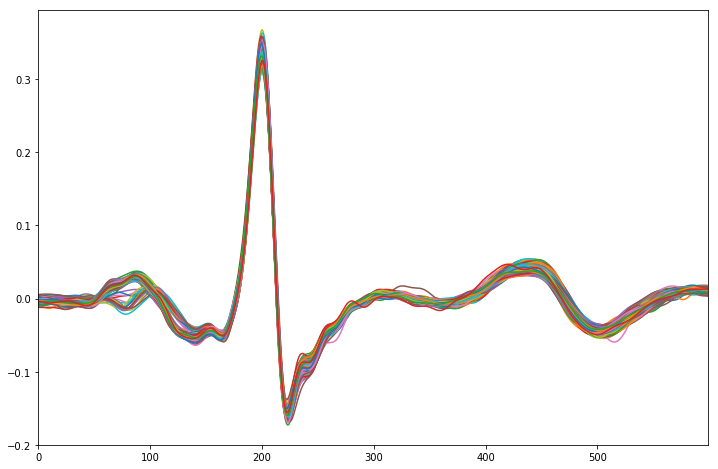

In [4]:
pd.DataFrame(bio_features["Heart_Beats"]).T.plot(legend=False)  # Plot all the heart beats

This plot contains all 274 detected heart beats synchronized by their R peak.

### Heart Rate Variability (HRV)

In [5]:
# Print all the HRV indices
print(bio_features["HRV"])

{'lf_hf': 7.1500000000000004, 'mrri': 763.14999999999998, 'vlf': 363.76999999999998, 'lf': 1681.79, 'lfnu': 87.730000000000004, 'mhr': 78.969999999999999, 'sdnn': 50.920000000000002, 'pnn50': 4.7800000000000002, 'total_power': 2280.6799999999998, 'hfnu': 12.27, 'nn50': 13.0, 'hf': 235.12, 'rmssd': 24.699999999999999}


In [6]:
## Add Processed Signals  to Data Frame
df["ECG_Filtered"] = bio_features["ECG_Filtered"]
df["Heart_Rate"] = bio_features["Heart_Rate"]
df["RSP_Filtered"] = bio_features["RSP_Filtered"]
df["RSP_Rate"] = bio_features["RSP_Rate"]
df["EDA_Phasic"] = bio_features["EDA_Phasic"]

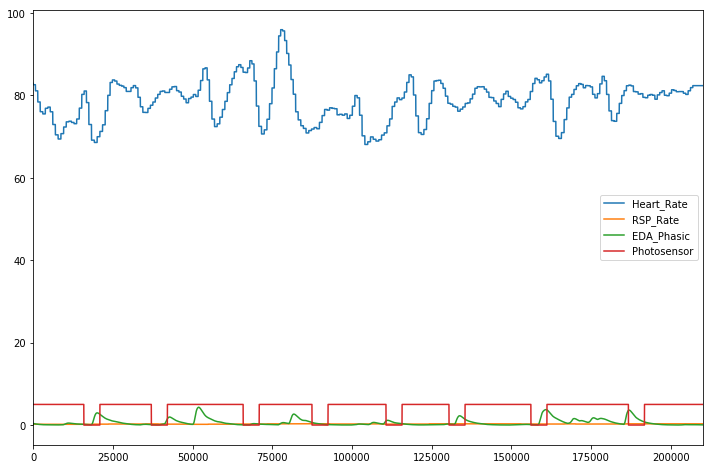

In [7]:
df[["Heart_Rate", "RSP_Rate", "EDA_Phasic", "Photosensor"]].plot()

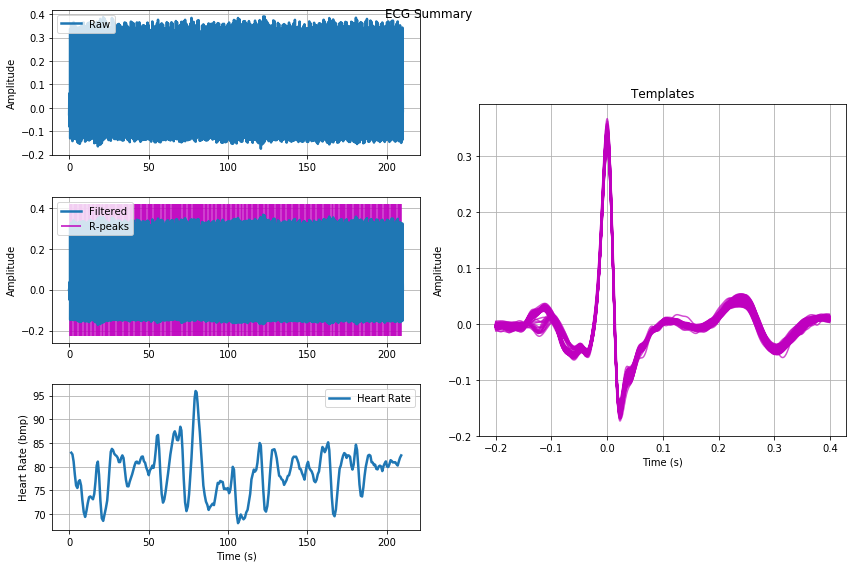

ReturnTuple(ts=array([  0.00000000e+00,   9.99995238e-04,   1.99999048e-03, ...,
         2.09996000e+02,   2.09997000e+02,   2.09998000e+02]), filtered=array([ -1.15715534e-03,  -4.98122020e-05,   1.00955603e-03, ...,
         1.92918221e-04,  -2.08957127e-04,  -5.81809947e-04]), rpeaks=array([   630,   1352,   2078,   2809,   3572,   4377,   5177,   5956,
         6719,   7510,   8325,   9190,  10068,  10918,  11737,  12557,
        13364,  14178,  15008,  15825,  16603,  17351,  18070,  18824,
        19660,  20549,  21429,  22285,  23122,  23955,  24756,  25488,
        26209,  26921,  27637,  28365,  29096,  29820,  30553,  31294,
        32043,  32776,  33493,  34228,  34976,  35757,  36560,  37348,
        38130,  38902,  39667,  40426,  41170,  41910,  42649,  43390,
        44140,  44879,  45599,  46333,  47070,  47817,  48560,  49326,
        50092,  50861,  51598,  52354,  53105,  53855,  54570,  55260,
        55938,  56647,  57414,  58237,  59074,  59899,  60700,  61484,
 

In [10]:
import biosppy
biosppy.ecg.ecg(df["ECG"])